#1970년 보스톤 지역의 주택가격 예측
* 1970년대 보스턴 지역의 범죄율, 토지 지역의 비율, 방 개수 등 14개 특성으로 이루어진 데이터
* 연속적인 값을 예측하는 회귀 문제(Regression) 정의

## 1.데이터 준비하기

In [13]:
from keras.datasets.boston_housing import load_data

(X_train,y_train),(X_test,y_test)=load_data(path='boston_housing.npz',
                                            test_split=0.2,
                                            seed=777)

In [14]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(404, 13) (404,) (102, 13) (102,)


## 2.데이터 전처리

### 데이터 스케일링 -> 표준화

In [18]:
X_train[0]

array([[-0.40102395, -0.48033655, -0.12089418, ...,  0.0756568 ,
         0.37366783,  0.69211835],
       [ 1.27456268, -0.48033655,  0.96279947, ...,  0.81106366,
        -3.63731409,  1.56173624],
       [ 0.36674834, -0.48033655,  0.96279947, ...,  0.81106366,
        -0.4121379 ,  1.83787084],
       ...,
       [-0.32196549, -0.48033655, -0.4744294 , ...,  1.17876709,
         0.42735772,  0.94215066],
       [-0.41947243, -0.48033655, -0.78900359, ...,  0.35143437,
         0.45215384, -0.58414552],
       [-0.3884412 , -0.48033655, -0.22046124, ..., -0.01626906,
         0.43944058, -0.51408152]])

In [16]:
import numpy as np

#기준값
mean=np.mean(X_train,axis=0)
std=np.std(X_train, axis=0)

#표준화
X_train = (X_train - mean) / std
X_test =(X_test -mean )

In [17]:
X_train[0]

array([-0.40102395, -0.48033655, -0.12089418, -0.28828791, -0.58254176,
       -0.68137272,  0.11117586,  0.26484408, -0.65187119, -0.80249043,
        0.0756568 ,  0.37366783,  0.69211835])

### 훈련셋과 검증셋 분리

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_val ,y_train,y_val=train_test_split(X_train,y_train,test_size=0.33 ,random_state=777)

In [22]:
print(X_train.shape,X_val.shape)

(270, 13) (134, 13)


## 3.모델 구성

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(64,input_shape=(13,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

## 4.모델 설정

In [25]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','mse']) #mse 평균제곱오차 ,mas평균 절대오차 >>양수변환

## 5. 모델 학습

In [26]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val,y_val),
                    epochs=300)

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 528.1620 - mae: 21.6543 - mse: 528.1620 - val_loss: 599.1799 - val_mae: 22.3998 - val_mse: 599.1799
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 531.9268 - mae: 21.3448 - mse: 531.9268 - val_loss: 572.3904 - val_mae: 21.8175 - val_mse: 572.3904
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 515.1428 - mae: 20.9345 - mse: 515.1428 - val_loss: 542.5978 - val_mae: 21.1686 - val_mse: 542.5978
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 491.4774 - mae: 20.4698 - mse: 491.4774 - val_loss: 506.6418 - val_mae: 20.3633 - val_mse: 506.6418
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 423.0628 - mae: 19.0815 - mse: 423.0628 - val_loss: 462.7532 - val_mae: 19.3248 - val_mse: 462.7532
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 384.6129 - mae: 18.0228 - mse: 384.6129 - val_loss: 407.9856 - val_mae: 17.9548 - val_mse: 407.9856
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - 

### 학습결과 확인하기

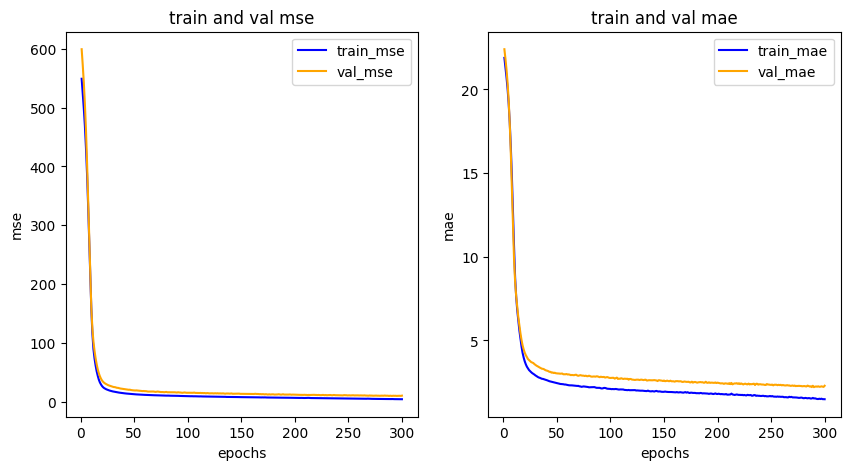

In [27]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

## 6.모델 성능 평가

In [28]:
model.evaluate(X_test,y_test) #- mae: 2.2559 실제 집값과 2300달러 차이


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.4592 - mae: 2.2559 - mse: 9.4592  


[8.866292953491211, 2.139763116836548, 8.866292953491211]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


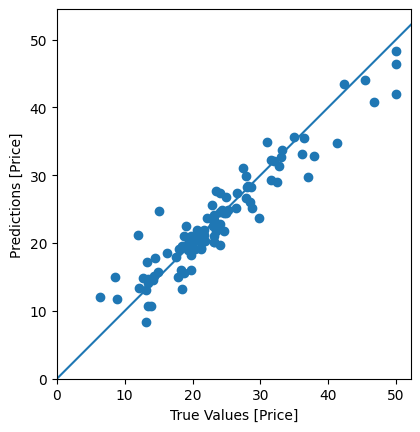

In [30]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])